## Numerical Differentiation

### Problem 1:

In [2]:
import sympy as sy
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def prob_1():
    x = sy.symbols('x')
    f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
    d_f = sy.lambdify(x, sy.diff(f, x), modules="numpy")
    return d_f

In [4]:
def test_1():
    f = prob_1()
    domain = np.linspace(-np.pi, np.pi, 100)
    y = f(domain)
    plt.plot(domain, y)
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    plt.show()

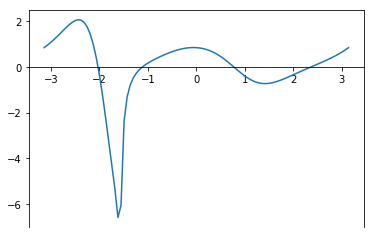

In [5]:
test_1()

### Problem 2:

In [6]:
def forward_1(f, x, h):
    return (f(x+h) - f(x)) / h

def forward_2(f, x, h):
    return (-3*f(x) + 4*f(x + h) - f(x + 2*h)) / (2*h)

def backward_1(f, x, h):
    return (f(x) - f(x - h)) / h

def backward_2(f, x, h):
    return (3*f(x) - 4*f(x - h) + f(x - 2*h)) / (2*h)

def centered_2(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

def centered_4(f, x, h):
    return (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)) / (12*h)

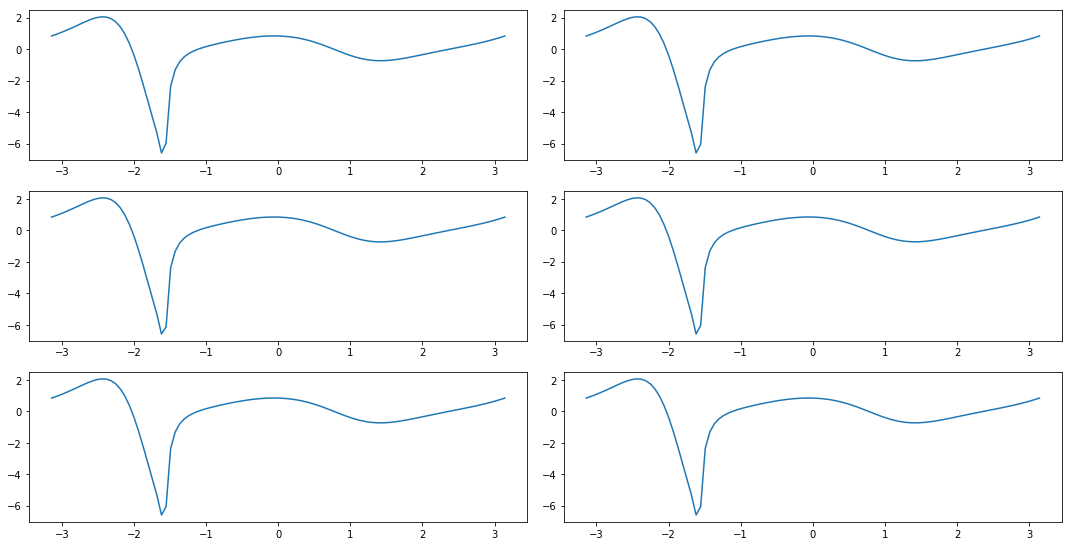

In [7]:
domain = np.linspace(-np.pi, np.pi, 100)
h = 1e-3

x = sy.symbols('x')
f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
f = sy.lambdify(x, f, modules="numpy")


plt.figure(figsize=(15,15))
plt.subplot(621)
plt.plot(domain, forward_1(f, domain, h))

plt.subplot(622)
plt.plot(domain, forward_2(f, domain, h))

plt.subplot(623)
plt.plot(domain, backward_1(f, domain, h))

plt.subplot(624)
plt.plot(domain, backward_2(f, domain, h))

plt.subplot(625)
plt.plot(domain, centered_2(f, domain, h))

plt.subplot(626)
plt.plot(domain, centered_4(f, domain, h))

plt.tight_layout()
plt.show()

### Problem 3:

In [8]:
def prob_3(x_0):
    x = sy.symbols('x')
    f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
    f = sy.lambdify(x, f, modules="numpy")
    
    h = np.logspace(-8, 0, 8)
    d_f = prob_1()
    true_val = d_f(x_0)
    
    err_1f = np.zeros(8)
    err_2f = np.zeros(8)
    err_1b = np.zeros(8)
    err_2b = np.zeros(8)
    err_2c = np.zeros(8)
    err_4c = np.zeros(8)
    for i in range(8):
        err_1f[i] = abs(forward_1(f, x_0, h[i]) - true_val)
        err_2f[i] = abs(forward_2(f, x_0, h[i]) - true_val)
        err_1b[i] = abs(backward_1(f, x_0, h[i]) - true_val)
        err_2b[i] = abs(backward_2(f, x_0, h[i]) - true_val)
        err_2c[i] = abs(centered_2(f, x_0, h[i]) - true_val)
        err_4c[i] = abs(centered_4(f, x_0, h[i]) - true_val)
    

    plt.figure(figsize=(10,5 ))
    plt.loglog(h, err_1f, label="Order 1 Forward")
    plt.loglog(h, err_2f, label="Order 2 Forward")
    plt.loglog(h, err_1b, label="Order 1 Backward")
    plt.loglog(h, err_2b, label="Order 2 Backward")
    plt.loglog(h, err_2c, label="Order 2 Centered")
    plt.loglog(h, err_4c, label="Order 4 Centered")
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.legend(loc="upper left")
    plt.show()


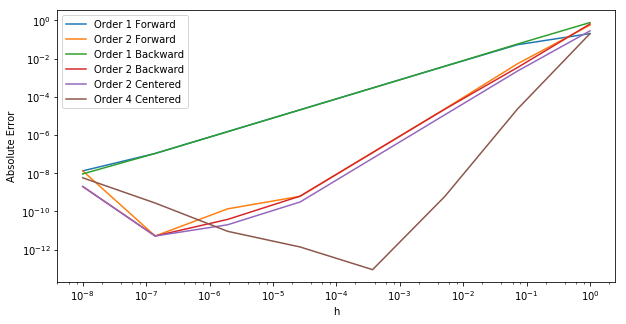

In [9]:
prob_3(1)

### Problem 4:

In [10]:
def prob_4():
    plane = np.load('plane.npy')
    alpha = np.deg2rad(plane[:,1])
    beta = np.deg2rad(plane[:,2])
    x = alpha * (np.tan(beta) / (np.tan(beta) - np.tan(alpha)))
    y = alpha * (np.tan(beta) * np.tan(alpha) / (np.tan(beta) - np.tan(alpha)))
    
    dx = np.zeros(x.size - 1)
    dy = np.zeros(x.size - 1)
    for t in range (7):
        if t == 0:
            dx[t] = (x[t + 1] - x[t]) / 1 # forward different quotient
            dy[t] = (y[t + 1] - y[t]) / 1
        if t == 6:
            dx[t] = (x[t] - x[t-1]) / 1 # backward difference quotient
            dy[t] = (y[t] - y[t-1]) / 1
        else:
            dx[t] = (x[t + 1] - x[t - 1]) / 2 # centered difference quotient
            dy[t] = (y[t + 1] - y[t - 1]) / 2
    
    speed = np.zeros_like(dx)
    for t in range(7):
        speed[t] = np.sqrt(x[t] **2 + y[t] **2)
    
    return speed

In [11]:
prob_4()

array([ 4.63429301,  4.64384165,  4.65224242,  4.66345955,  4.67343273,
        4.6844921 ,  4.69974042])

### Problem 5:

In [12]:
def prob_5(f, x, h):
    idn = np.identity(x.shape[0])
    result = np.zeros((f.shape[0], x.shape[0]))
    for i in range(x.shape[0]):
        result[:,i] = (f(x + h*idn[i]) - f(x - h*idn[i])) / (2*h)
    
    return result

In [13]:
x = sy.symbols('x')
y = sy.symbols('y')
f = sy.Matrix([x**2, x**3 - y])
X = sy.Matrix([x, y])


### Problem 6:

In [53]:
from autograd import grad
import autograd.numpy as anp
import time

def problem_6():
    # SymPy
    x = sy.symbols('x')
    f = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
    start = time.time()
    sym_x = sy.lambdify(x, sy.diff(f, x), modules="numpy")(np.pi)
    print("Sympy:\nComputation Time:", time.time() - start, 
          "\nError: n/a \n")

    # Autograd
    f = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
    start = time.time()
    grad_x = grad(f)(np.pi)
    grad_err = grad_x - sym_x
    print("Autograd:\nComputation Time:", time.time() - start,
          "\nError:", grad_err)
    

    # Second order centered difference quotient
    start=  time.time()
    approx_x = centered_2(f, np.pi, 1e-3)
    approx_err = approx_x - sym_x
    print("\nSecond order diff quotient:\nComputation Time:",
          time.time() - start, "\nError:", approx_err)
    
    

In [54]:
problem_6()

Sympy:
Computation Time: 0.003609895706176758 
Error: n/a 

Autograd:
Computation Time: 0.0002639293670654297 
Error: 0.0

Second order diff quotient:
Computation Time: 4.410743713378906e-05 
Error: 2.13656648276e-09


### Problem 7: